# Drawer

In [2]:
#| default_exp core

In [3]:
#| export
import json
from PIL import Image, ImageDraw, ImageFont

In [4]:
#| exports
def draw_card(img_path, height=420, width=420):
    """
    Loads an image, rescales it and adds a border.
    """
    img1 = Image.open(img_path).convert("RGBA")
    img1 = img1.resize((height, width))
    img2 = Image.new("RGBA", (height, width))
    draw1 = ImageDraw.Draw(img1) 
    draw = ImageDraw.Draw(img2)
    draw.line((0, 0) + img2.size, fill=128)
    draw.line((0, img2.size[1], img2.size[0], 0), fill=128)
    f_outer, f_inner = 10, 20
    draw.rectangle([(0, 0), (img2.size[0], img2.size[1])], fill = (140, 50, 100, 255))
    draw.rounded_rectangle([(f_outer, f_outer), (img2.size[0]-f_outer, img2.size[1]-f_outer)], fill = (255, 255, 255, 255), radius=20)
    draw.rounded_rectangle([(f_inner, f_inner), (img2.size[0]-f_inner, img2.size[1]-f_inner)], fill = (255, 255, 255, 0), outline=(255, 255, 255, 255), radius=20)
    return Image.alpha_composite(img1, img2,)

In [5]:
#| exports
def load_taboo_words(file_path):
    with open(file_path, 'r') as f:
        out = json.load(f)
    return out

In [6]:
#| export
def _resize_font(text, max_width, max_height):
    font_size = 1
    font_file = "./dejavu/DejaVuSansMono-Bold.ttf"
    font = ImageFont.truetype(font_file, font_size)
    x0, y0, x1, y1 = font.getbbox(text)
    text_width, text_height = x1 - x0, y1 - y0
    while text_width < max_width and text_height < max_height:
        font_size += 1
        font = ImageFont.truetype(font_file, font_size)
        x0, y0, x1, y1 = font.getbbox(text)
        text_width, text_height = x1 - x0, y1 - y0
    font_size -= 5
    return ImageFont.truetype(font_file, font_size)

In [7]:
#| export
def _capitalize_all(text):
    return ' '.join([word.capitalize() for word in text.split(' ')])

In [27]:
#| exports
def add_taboo_words(img, words):
    """
    Adds the taboo words to an image to make it a Taboo card.
    """
    top_w, forb_ws = list(words.items())[0]
    top_w = _capitalize_all(top_w)
    forb_ws = [_capitalize_all(w) for w in forb_ws]
    new_im = Image.new("RGBA", img.size)
    draw = ImageDraw.Draw(new_im)
    draw.rounded_rectangle([(50, 50), (img.width-50, 100)], fill = (255, 255, 255, 50), radius=20)
    start_font_size = 10
    fontsize = start_font_size
    font = _resize_font(top_w, img.width-100, 50)
    draw.text((img.width // 2, 75), top_w, fill=(0, 0, 0, 255), anchor="mm", font=font)

    for idx, forb_w in enumerate(forb_ws[:5]):
        down_shift = (50 / 2.5) + (idx + 1) * (50)
        draw.rounded_rectangle([(70, 50 + down_shift), (img.width-70, 90 + down_shift)], fill = (255, 255, 255, 50), radius=20)
        font = _resize_font(forb_w, img.width-140, 40)
        draw.text((img.width // 2, 70 + down_shift), forb_w, fill=(0, 0, 0, 255), anchor="mm", font=font)

    return Image.alpha_composite(img, new_im,)

In [2]:
#| hide
import nbdev; nbdev.nbdev_export()

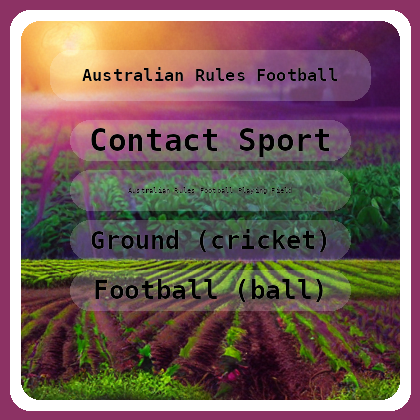

In [38]:
#| hide
img = draw_card("./test_data/raw_images/organic_farming_raw.png")
test_words = load_taboo_words("./test_data/taboo_cards/test_organic_farming.json")
words = load_taboo_words("./test_data/taboo_cards/Football.json")["cards"]
add_taboo_words(img, words[9])